This notebook is for reproducing all results reported in paper "Every Comment, Every Conversation, All at Once: Evaluating Conversational Forecasting Models".
The results include:
1. Performance of CRAFT models
2. Performance of BERT-base and RoBERTa-large models
3. Performance of zero-shot Gemma-2 and GPT-4o
4. Performance of fine-tuned Gemma-2

In [1]:
import sys
sys.path.insert(0, "/home/sqt2/CALMpaper/ConvoKit")

In [2]:
from convokit import download, Corpus, Forecaster, BERTCGAModel
from functools import partial
import json, os, copy

In [3]:
# CPU mode (noting that it will be slower)
DEVICE = "cuda"

corpus_name = "cga-wikiconv"
# corpus_name = "cga-cmv-legacy"
# corpus_name = "cga-cmv-large"
label_metadata = "has_removed_comment" if 'cmv' in corpus_name else 'conversation_has_personal_attack'

In [4]:
if corpus_name == "cga-wikiconv":
    corpus = Corpus(filename=download("conversations-gone-awry-corpus", data_dir="YOUR_DATA_DIRECTORY"))
elif corpus_name == "cga-cmv-legacy":
    corpus = Corpus(filename=download("conversations-gone-awry-cmv-corpus", data_dir="YOUR_DATA_DIRECTORY"))
elif corpus_name == "cga-cmv-large":
    raise ValueError(f"The corpus {corpus_name} has not been published. This corpus is not available.")

Dataset already exists at /home/sqt2/CALMpaper/ConvoKit/examples/forecaster/YOUR_DATA_DIRECTORY/conversations-gone-awry-corpus


## Define selectors for the Forecaster

Core to the flexibility of the `Forecaster` framework is the concept of *selectors*. 

To capture the temporal dimension of the conversational forecasting task, `Forecaster` iterates through conversations in chronological utterance order, at each step presenting to the backend forecasting model a "context tuple" containing both the comment itself and the full "context" preceding that comment. As a general framework, `Forecaster` on its own does not try to make any further assumptions about what "context" should contain or look like; it simply presents context as a chronologically ordered list of all utterances up to and including the current one. 

In [5]:

def transform_selector(context_tuple):
    """
    For transform we only need to check that the conversation is in the test split
    """
    convo = context_tuple.current_utterance.get_conversation()
    convo_length = len(convo.get_chronological_utterance_list())

    matches_split = (context_tuple.current_utterance.get_conversation().meta["split"] == "test")
    is_end = (len(context_tuple.context) == convo_length)

    return (matches_split and not is_end)

In [6]:
def update_metrics(all_results, cur_metrics):
    for metric in cur_metrics:
        all_results[metric] = all_results.get(metric, []) + [cur_metrics[metric]]
    return all_results

# BERT and RoBERTa

Evaluating Random Seed 1


100%|██████████| 5131/5131 [00:48<00:00, 106.65it/s]


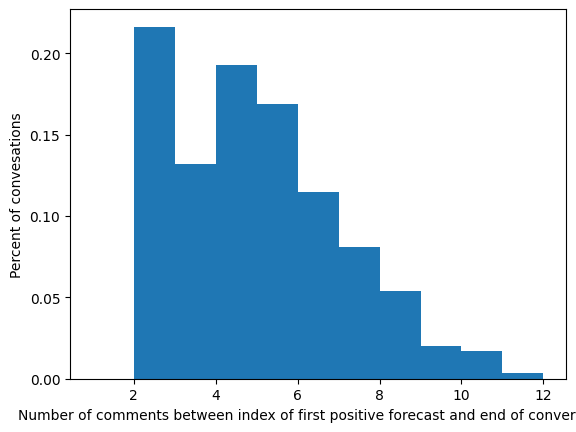

Horizon statistics (# of comments between first positive forecast and conversation end):
Mean = 3.5488215488215484, Median = 3.0
Accuracy                                                         0.683333
Precision                                                           0.675
Recall                                                           0.707143
FPR                                                              0.340476
F1                                                               0.690698
Mean H                                                           3.548822
Correct Adjustment                                               0.036905
Incorrect Adjustment                                             0.053571
Recovery                                                        -0.016667
Leaderboard String      | MODEL_NAME     | 68.3   | 67.5  | 70.7 | 69....
dtype: object
Evaluating Random Seed 2


100%|██████████| 5131/5131 [00:46<00:00, 110.00it/s]


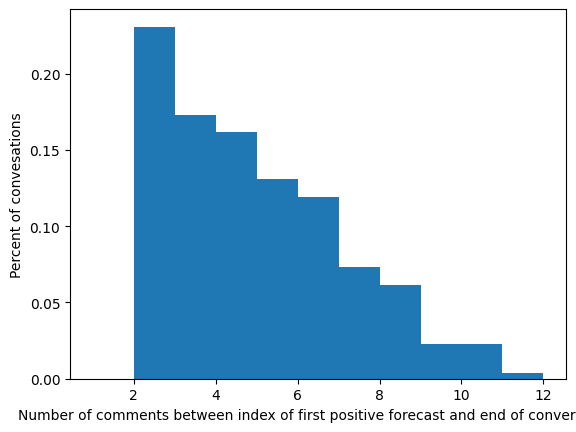

Horizon statistics (# of comments between first positive forecast and conversation end):
Mean = 3.5134099616858236, Median = 3.0
Accuracy                                                         0.666667
Precision                                                        0.683246
Recall                                                           0.621429
FPR                                                              0.288095
F1                                                               0.650873
Mean H                                                            3.51341
Correct Adjustment                                                   0.05
Incorrect Adjustment                                             0.066667
Recovery                                                        -0.016667
Leaderboard String      | MODEL_NAME     | 66.7   | 68.3  | 62.1 | 65....
dtype: object
Evaluating Random Seed 3


100%|██████████| 5131/5131 [00:46<00:00, 109.43it/s]


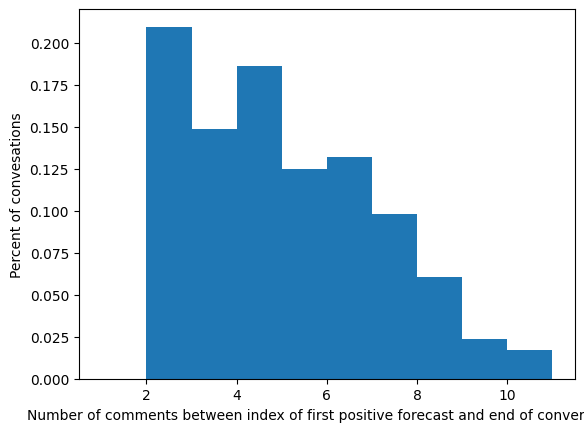

Horizon statistics (# of comments between first positive forecast and conversation end):
Mean = 3.609427609427609, Median = 3.0
Accuracy                                                         0.679762
Precision                                                        0.670429
Recall                                                           0.707143
FPR                                                              0.347619
F1                                                               0.688297
Mean H                                                           3.609428
Correct Adjustment                                               0.041667
Incorrect Adjustment                                             0.060714
Recovery                                                        -0.019048
Leaderboard String      | MODEL_NAME     | 68.0   | 67.0  | 70.7 | 68....
dtype: object
Evaluating Random Seed 4


100%|██████████| 5131/5131 [00:46<00:00, 109.93it/s]


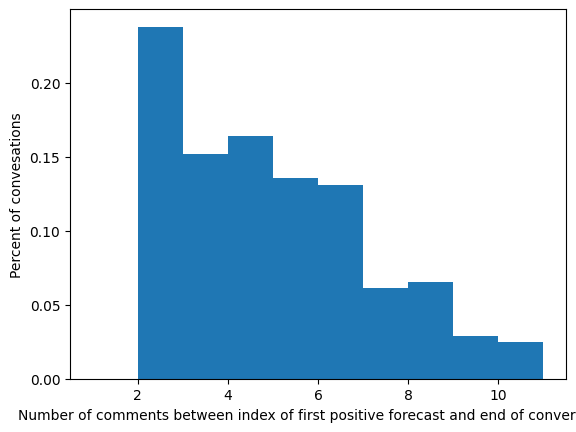

Horizon statistics (# of comments between first positive forecast and conversation end):
Mean = 3.5428571428571427, Median = 3.0
Accuracy                                                             0.65
Precision                                                        0.673077
Recall                                                           0.583333
FPR                                                              0.283333
F1                                                                  0.625
Mean H                                                           3.542857
Correct Adjustment                                                   0.05
Incorrect Adjustment                                             0.066667
Recovery                                                        -0.016667
Leaderboard String      | MODEL_NAME     | 65.0   | 67.3  | 58.3 | 62....
dtype: object
Evaluating Random Seed 5


100%|██████████| 5131/5131 [00:47<00:00, 109.16it/s]


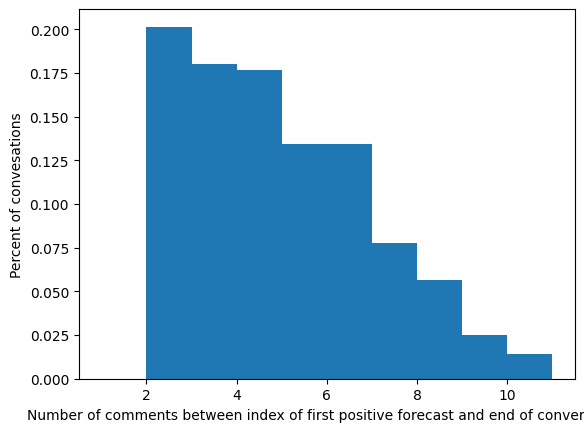

Horizon statistics (# of comments between first positive forecast and conversation end):
Mean = 3.517605633802817, Median = 3.0
Accuracy                                                         0.665476
Precision                                                        0.662005
Recall                                                            0.67619
FPR                                                              0.345238
F1                                                               0.669022
Mean H                                                           3.517606
Correct Adjustment                                               0.067857
Incorrect Adjustment                                              0.07619
Recovery                                                        -0.008333
Leaderboard String      | MODEL_NAME     | 66.5   | 66.2  | 67.6 | 66....
dtype: object
Evaluating Random Seed 6


100%|██████████| 5131/5131 [00:46<00:00, 109.69it/s]


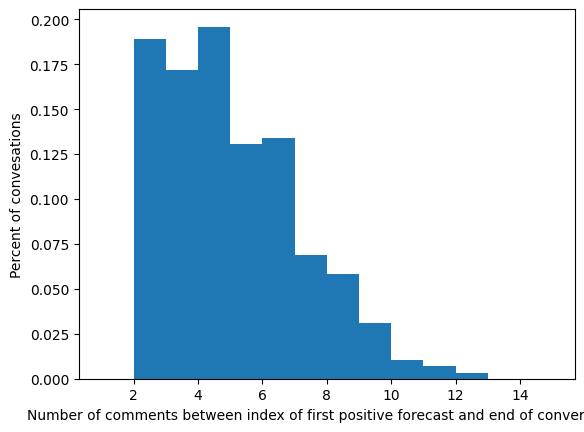

Horizon statistics (# of comments between first positive forecast and conversation end):
Mean = 3.6198630136986303, Median = 3.0
Accuracy                                                         0.679762
Precision                                                        0.674365
Recall                                                           0.695238
FPR                                                              0.335714
F1                                                               0.684642
Mean H                                                           3.619863
Correct Adjustment                                               0.055952
Incorrect Adjustment                                             0.069048
Recovery                                                        -0.013095
Leaderboard String      | MODEL_NAME     | 68.0   | 67.4  | 69.5 | 68....
dtype: object
Evaluating Random Seed 7


100%|██████████| 5131/5131 [00:47<00:00, 109.08it/s]


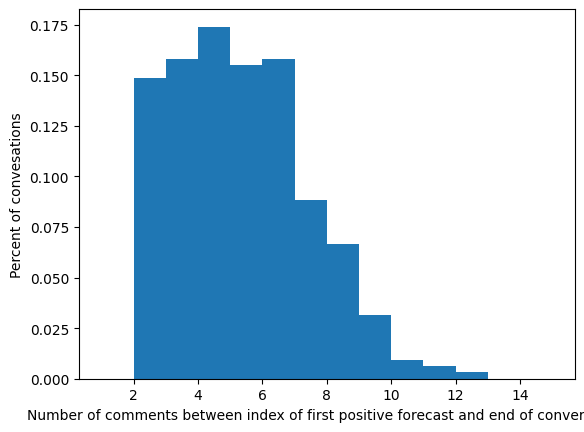

Horizon statistics (# of comments between first positive forecast and conversation end):
Mean = 3.867507886435331, Median = 4.0
Accuracy                                                         0.663095
Precision                                                        0.637827
Recall                                                           0.754762
FPR                                                              0.428571
F1                                                               0.691385
Mean H                                                           3.867508
Correct Adjustment                                                  0.075
Incorrect Adjustment                                             0.072619
Recovery                                                         0.002381
Leaderboard String      | MODEL_NAME     | 66.3   | 63.8  | 75.5 | 69....
dtype: object
Evaluating Random Seed 8


100%|██████████| 5131/5131 [00:46<00:00, 109.58it/s]


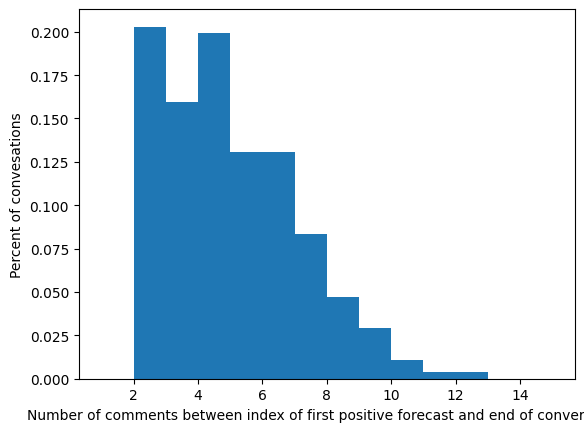

Horizon statistics (# of comments between first positive forecast and conversation end):
Mean = 3.5703971119133575, Median = 3.0
Accuracy                                                         0.678571
Precision                                                        0.685644
Recall                                                           0.659524
FPR                                                              0.302381
F1                                                                0.67233
Mean H                                                           3.570397
Correct Adjustment                                                   0.05
Incorrect Adjustment                                                0.075
Recovery                                                           -0.025
Leaderboard String      | MODEL_NAME     | 67.9   | 68.6  | 66.0 | 67....
dtype: object
Evaluating Random Seed 9


100%|██████████| 5131/5131 [00:47<00:00, 108.99it/s]


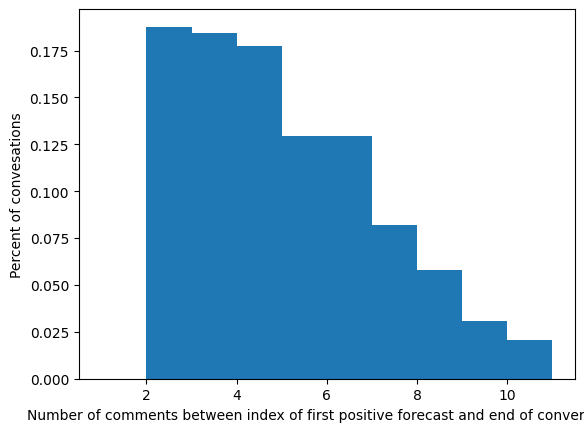

Horizon statistics (# of comments between first positive forecast and conversation end):
Mean = 3.6156462585034017, Median = 3.0
Accuracy                                                         0.659524
Precision                                                        0.647577
Recall                                                                0.7
FPR                                                              0.380952
F1                                                               0.672769
Mean H                                                           3.615646
Correct Adjustment                                               0.053571
Incorrect Adjustment                                             0.058333
Recovery                                                        -0.004762
Leaderboard String      | MODEL_NAME     | 66.0   | 64.8  | 70.0 | 67....
dtype: object
Evaluating Random Seed 10


100%|██████████| 5131/5131 [00:46<00:00, 109.91it/s]


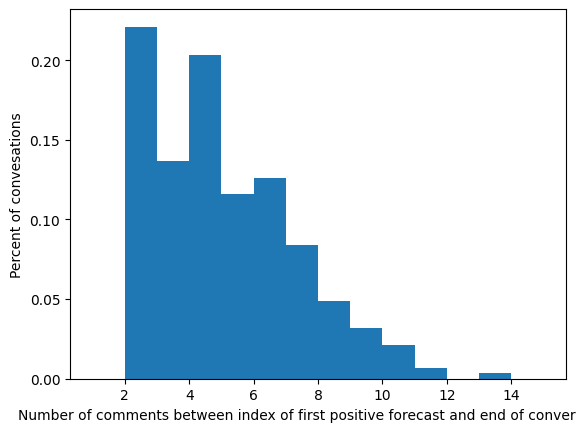

Horizon statistics (# of comments between first positive forecast and conversation end):
Mean = 3.6433566433566433, Median = 3.0
Accuracy                                                         0.659524
Precision                                                        0.652968
Recall                                                           0.680952
FPR                                                              0.361905
F1                                                               0.666667
Mean H                                                           3.643357
Correct Adjustment                                               0.042857
Incorrect Adjustment                                             0.061905
Recovery                                                        -0.019048
Leaderboard String      | MODEL_NAME     | 66.0   | 65.3  | 68.1 | 66....
dtype: object
{'Accuracy': 0.6685714285714287, 'Precision': 0.6662137103526862, 'Recall': 0.6785714285714287, 'FPR': 0.341428571428

In [7]:
saved_model_directory = '/reef/sqt2/ConvoKitCGA-Test/Normal/wikiconv/bert-base-cased'
# roberta-large can also be used with this class
all_results = {}
for seed in range(1,11):
    print(f"Evaluating Random Seed {seed}")
    config_dict = {
    "output_dir": f"YOUR_SAVING_DIRECTORY/seed{seed}", 
    "context_mode": "normal", # set to normal by default
    "device": DEVICE
    }
    saved_model_path = os.path.join(saved_model_directory, f'seed-{seed}')

    #Load pre-tuned config
    tuned_config_file = os.path.join(saved_model_path, "dev_config.json")
    with open(tuned_config_file, 'r') as file:
        tuned_config = json.load(file)
    
    normal_bert = BERTCGAModel(os.path.join(saved_model_path, tuned_config['best_checkpoint']), config=config_dict)
    normal_bert.best_threshold = tuned_config['best_threshold']
    normal_bert_forecaster = Forecaster(normal_bert, label_metadata)

    # corpus = copy.deepcopy(corpus)
    corpus = normal_bert_forecaster.transform(corpus, transform_selector)
    _, cur_metrics= normal_bert_forecaster.summarize(corpus, lambda c: c.meta['split'] == "test")

    update_metrics(all_results, cur_metrics)

for metric in all_results:
    if metric == "Leaderboard String":
        continue
    all_results[metric] = sum(all_results[metric]) / len(all_results[metric])

print(all_results)

In [9]:
leaderboard_string = (f"| BERT-base     | "
                              f"{all_results['Accuracy']*100:.1f}   | "
                              f"{all_results['Precision']*100:.1f}  | "
                              f"{all_results['Recall']*100:.1f} | "
                              f"{all_results['F1']*100:.1f}  | "
                              f"{all_results['FPR']*100:.1f}   | "
                              f"{all_results['Mean H']:.2f} | "
                              f"{(all_results['Correct Adjustment']-all_results['Incorrect Adjustment'])*100:.1f} "
                              f"({all_results['Correct Adjustment']*100:.1f} - {all_results['Incorrect Adjustment']*100:.1f})  |")
all_results['Leaderboard String'] = leaderboard_string
print(json.dumps(all_results, indent=4))


{
    "Accuracy": 0.6685714285714287,
    "Precision": 0.6662137103526862,
    "Recall": 0.6785714285714287,
    "FPR": 0.3414285714285714,
    "F1": 0.6711682543124684,
    "Mean H": 3.604889281050231,
    "Correct Adjustment": 0.052380952380952375,
    "Incorrect Adjustment": 0.06607142857142859,
    "Recovery": -0.013690476190476192,
    "Leaderboard String": "| BERT-base     | 66.9   | 66.6  | 67.9 | 67.1  | 34.1   | 3.60 | -1.4 (5.2 - 6.6)  |"
}
